<div style="text-align: center">
<img src="https://www.frenchscienceindia.org/wp-content/uploads/2017/02/Logo-Univ-Paris-Saclay.png" width="150px">
</div>

<div style="text-align: center">

# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

# Predict used cars prices!


_des lauriers Cédric, Cornille Théo_

# Introduction

When shopping for a used vehicle, typically an overriding concern is: Am I paying too much? This question is often difficult to answer due to the fact that it's hard to keep track of all the vehicles of interest currently available on the market.

A second, and related concern, is: Which vehicles with similar specifications are available? This information can help the buyer get a feel for what else is available on the market and provide an indication of the value of the vehicle currently under consideration.

<img src="https://static.carfromjapan.com/wp-content/uploads/2016/08/tips_for_buying_a_used_car.png" width="500px">

In this project, we would like to build a tool that helps both used car buyers and user car sellers. Indeed, it could help used car buyers to know which price they are going to pay depending on the characteristic they entered for a specific type of car. But, it will also help used car sellers to adjust their price.
Thus, the goal of this project is to develop prediction models able to predict the prices of used cars depending on their characteristics.
The solutions to this challenge must give the buyers some knowledge about what's make the price of a car.

## Metric used

In order to get accurate prices for new used cars, the mean squared error will be our metric for this challenge.

<img src="https://qph.fs.quoracdn.net/main-qimg-008e40d98b5ce869d6b19c8eb9108178" width="300px">

## The Data

The dataset we will manipulate comes from Ebay data. Ebay is an American multinational e-commerce corporation based in San Jose California, founded in 1995 that facilitates consumer-to-consumer and business-to-consumer sales through its website. Over 370000 used cars have been scraped with Scrapy.

As the content was in german, the data has been translated in english to be easily understandable. 

As inputs we have:
* name : "name" of the car
* seller : private or dealer
* offerType
* price : the price on the ad to sell the car
* abtest
* vehicleType
* yearOfRegistration : at which year the car was first registered
* gearbox
* powerPS : power of the car in PS
* model
* kilometer : how many kilometers the car has driven
* monthOfRegistration : at which month the car was first registered
* fuelType
* brand
* notRepairedDamage : if the car has a damage which is not repaired yet
* postalCode
* dateCreated : the date for which the ad at ebay was created
* dateCrawled : when this ad was first crawled, all field-values are taken from this date
* lastSeenOnline : when the crawler saw this ad last online

### Required dependencies and downloads

* `numpy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `imbalanced-learn`

You need to install our runing requirements to be able to use our notebook on your PC. Simply run the command below

In [ ]:
# !pip install -r requirements.txt

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  I ) Exploratory data analysis (brut data) 
This part aims to see what preprocessing we have to do on the data 

### Loading the data

In [3]:
train_filename = 'data/autos.csv'
data = pd.read_csv(train_filename, encoding = "latin-1")
#data['PurchDate'] = pd.to_datetime(data['PurchDate'])
print(data.shape)
data.head()

(371528, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
data.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

The training data frame has 72000+ instances.

In [124]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [125]:
# We count the missing data for each variable
missing_values = data.isnull().sum()
missing_values

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [126]:
cat_val = ["seller", "offerType", "abtest", "gearbox","fuelType", "notRepairedDamage", "vehicleType"]
for col in cat_val:
    print ([col],":",data[col].unique())

['seller'] : ['privat' 'gewerblich']
['offerType'] : ['Angebot' 'Gesuch']
['abtest'] : ['test' 'control']
['gearbox'] : ['manuell' 'automatik' nan]
['fuelType'] : ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['notRepairedDamage'] : [nan 'ja' 'nein']
['vehicleType'] : [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


#### There is some bad data a preprocessing is necessary 

In [5]:
# matrice de correlation 
import matplotlib.pyplot as plt

import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 20, 20) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


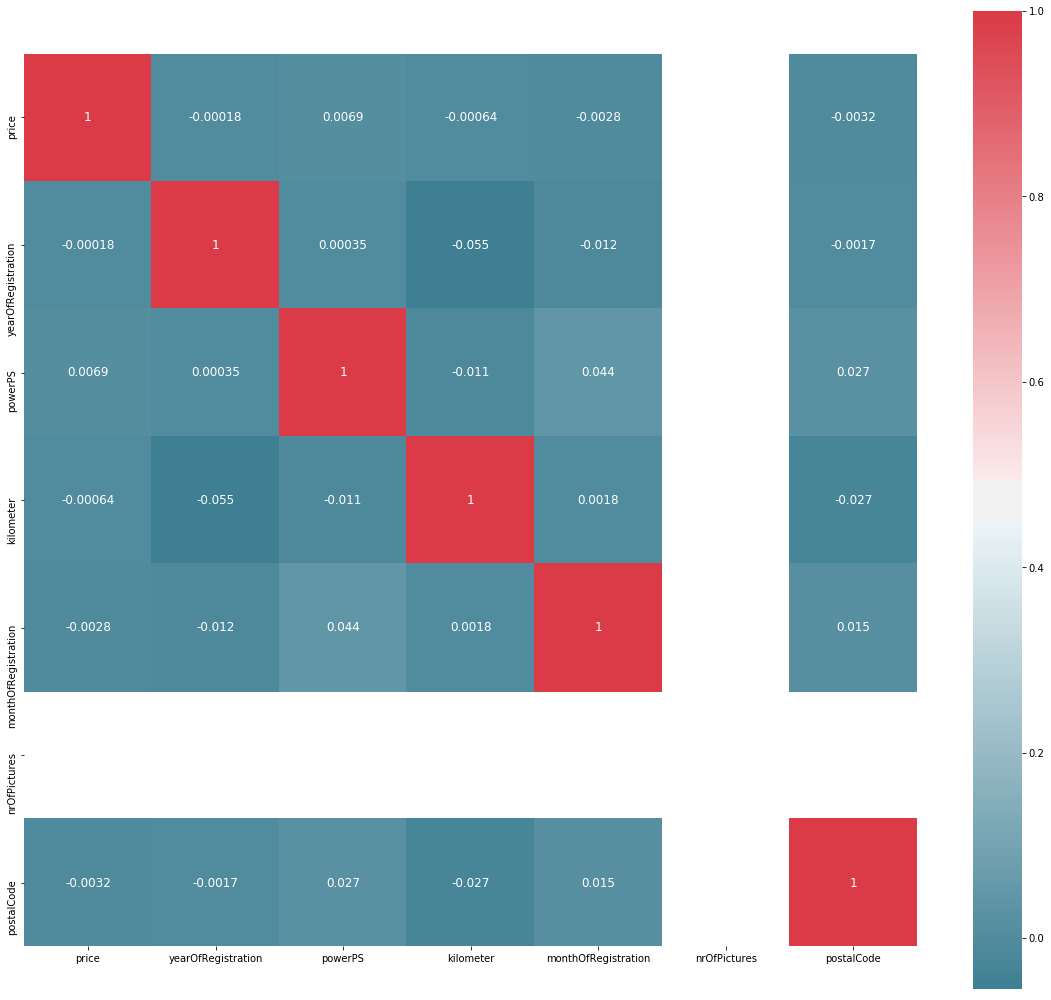

In [6]:
plot_correlation_map( data )

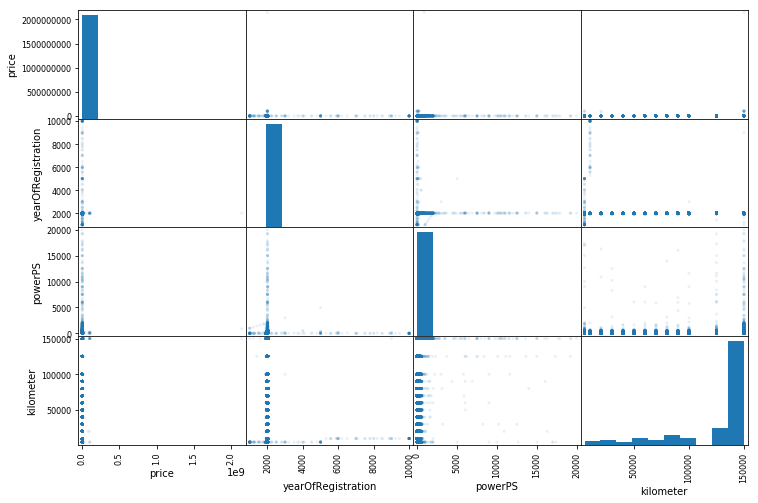

In [129]:
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(data[num_attributes], figsize = (12,8), alpha = 0.1)
plt.show()

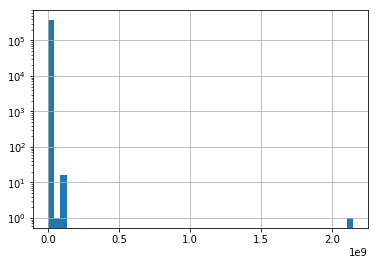

In [130]:
data["price"].hist(bins = 50, log = True)

#### Filter bad data

In [131]:
cars_c= data.copy()
cars_c = cars_c[
    (cars_c["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (cars_c["powerPS"].between(100, 500, inclusive=True)) &
    (cars_c["price"].between(100, 200000, inclusive=True))
]

After cleaning the database we can clear correlations beetween price, power, etc.

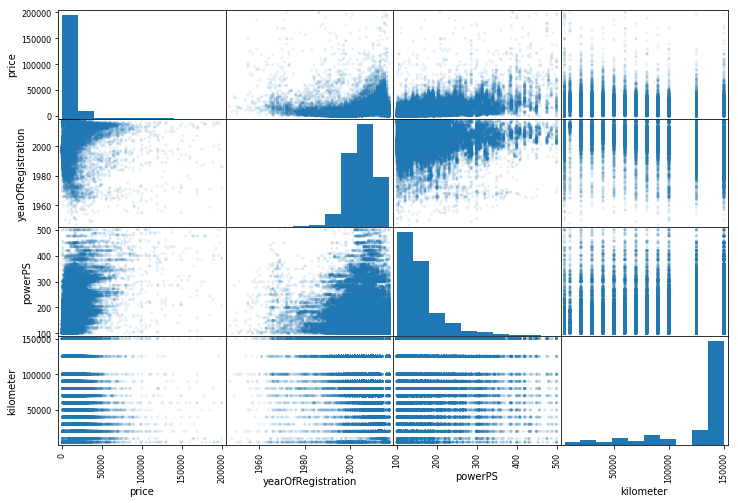

In [132]:
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(cars_c[num_attributes], figsize = (12,8), alpha = 0.1)
plt.show()

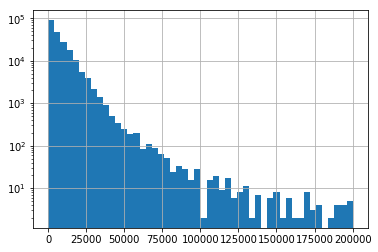

In [133]:
cars_c["price"].hist(bins = 50, log = True)

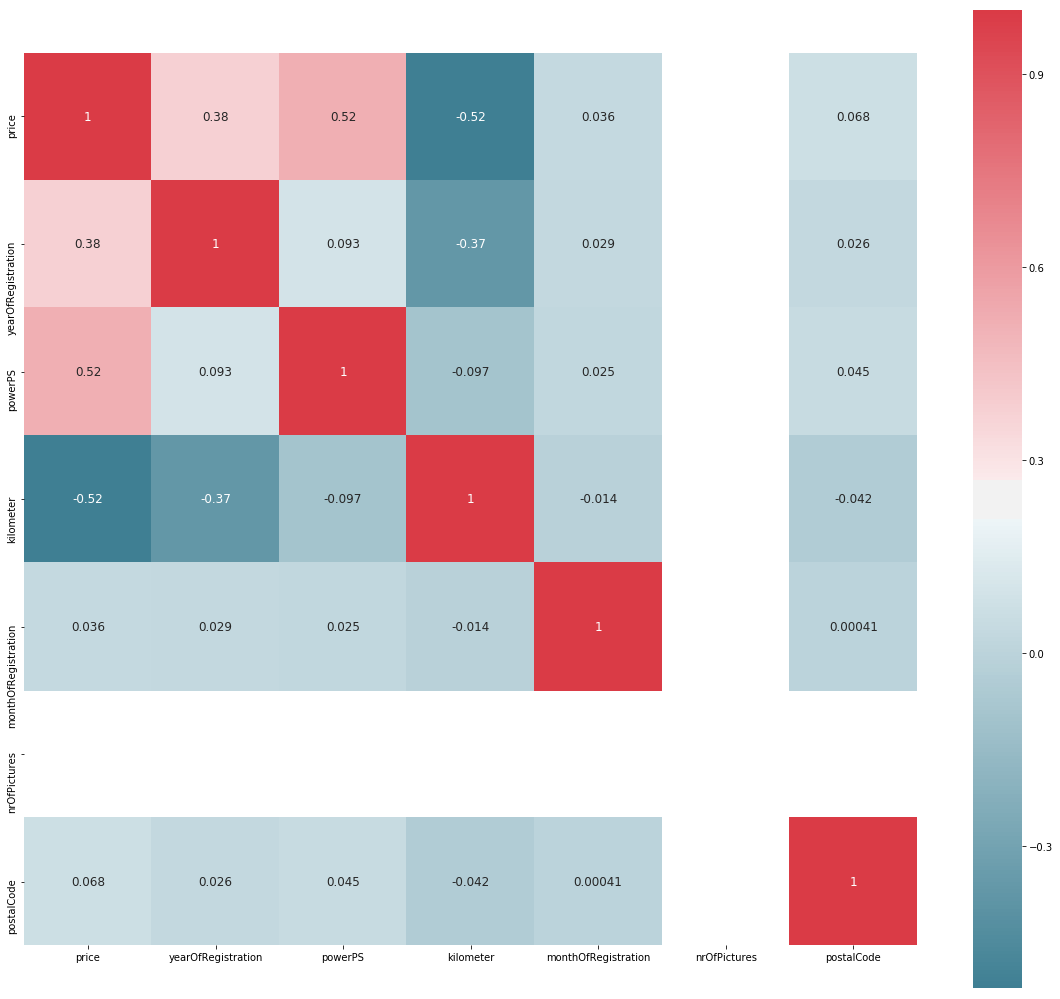

In [134]:
# more correlation with cleaned data 
plot_correlation_map( cars_c )


In [135]:
# Discarded amount of the Data

print("Current Data Amount : ", cars_c.shape[0], "\n","Current Data Amount %: ", cars_c.shape[0]/data.shape[0])

Current Data Amount :  209316 
 Current Data Amount %:  0.5633922611485541


# Clean data is created with problem.py

In [6]:
from problem import get_train_data, get_test_data

X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

In [7]:
X_train.head()


,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen,namelen
0,1,1,1,1995,0,200,38,150000,0,4,3,1,0,99603,77772,33
1,1,0,2,2005,2,163,192,150000,6,4,20,1,1,106008,78966,62
2,1,0,2,2006,2,109,8,80000,11,4,25,1,2,17392,71278,48
3,1,0,8,2009,0,239,167,125000,10,2,1,1,3,2059,15853,53
4,1,1,4,2009,2,160,28,100000,11,4,1,1,4,591,76814,59


In [14]:
max(y_train)

200000

# Exploration of the clean data 

In [15]:
import numpy as np
max(y_train), min(y_train), np.mean(y_train)

(200000, 100, 7875.3588135181135)

In [34]:
#X_train = X_train.reset_index().drop(['index' ], axis=1)

In [16]:
X_test.head()

,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen,namelen
0,40479,0,0,0,5,2011,2,122,165,60000,1,4,31,1,0,353,16414,53
1,52655,0,0,1,5,2009,2,101,63,50000,1,4,39,1,0,3477,20233,21
2,28295,0,0,0,7,2005,2,65,153,150000,8,4,23,1,0,3988,11997,23
3,44489,0,0,0,5,1997,2,90,118,150000,5,4,38,1,0,3115,17628,62
4,20869,0,0,1,5,2002,0,396,195,150000,7,4,13,2,0,1834,29543,15


In [8]:
import pandas as pd
y_train_dataframe  = pd.DataFrame({'price':y_train})
data_train_with_label = pd.concat([X_train, y_train_dataframe], axis=1)

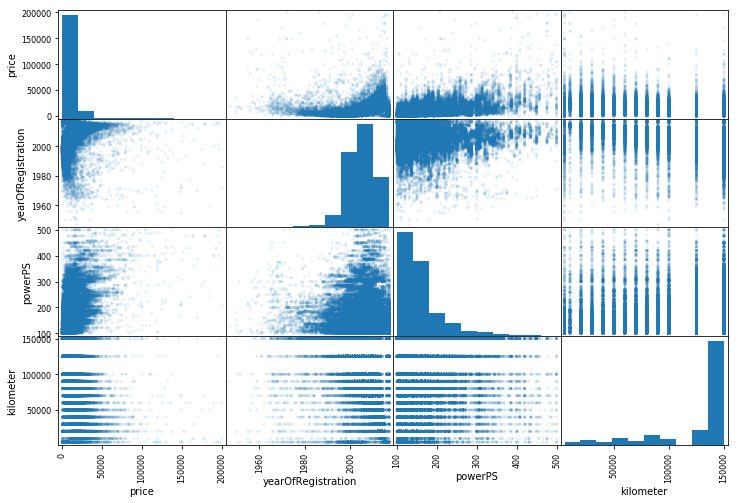

In [9]:
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(data_train_with_label[num_attributes], figsize = (12,8), alpha = 0.1)
plt.show()

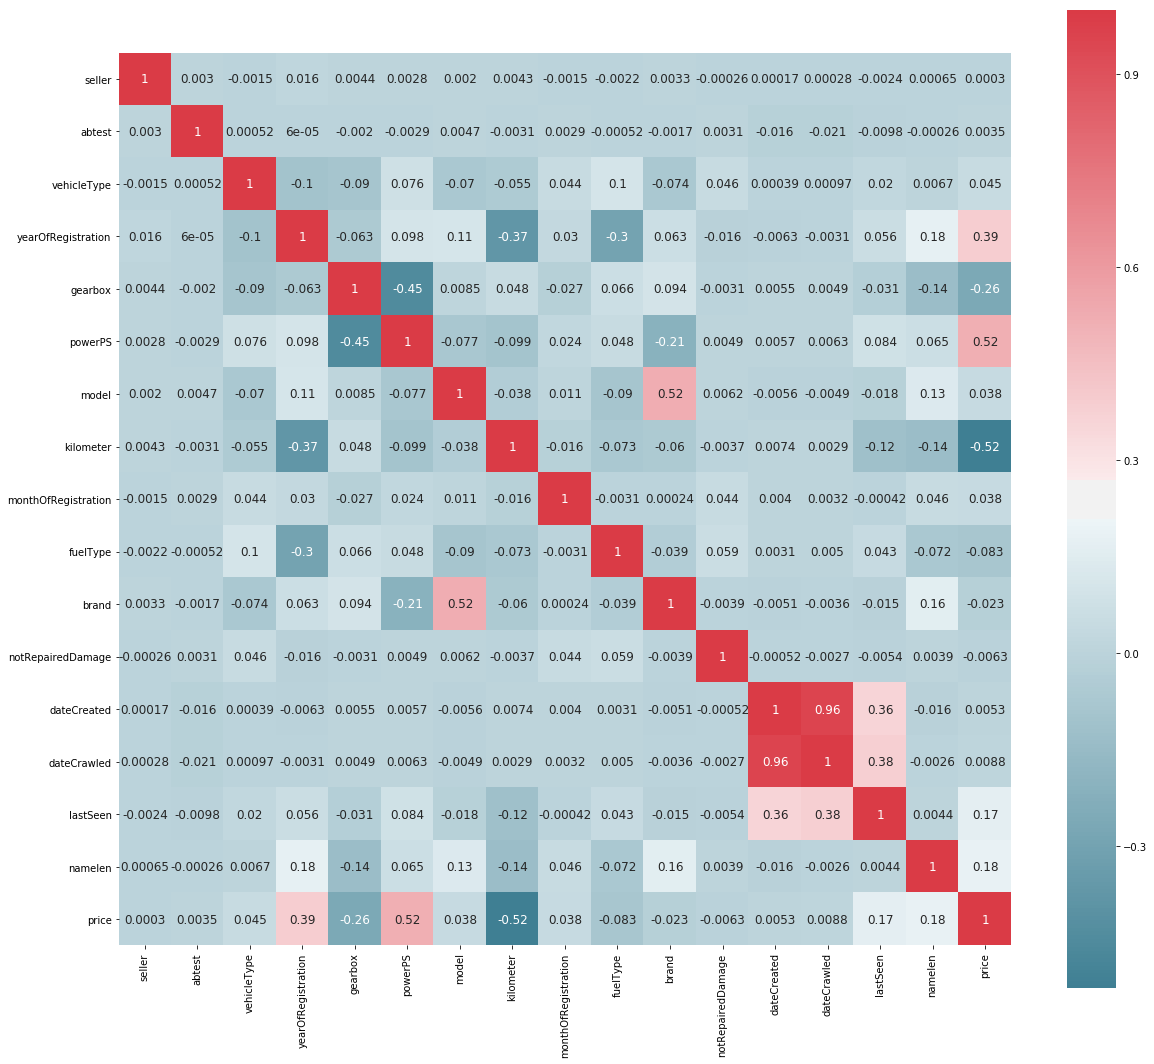

In [10]:
# peu de corrélation avec le prix : faire les traitements ! avec les requêtes 
plot_correlation_map( data_train_with_label)

D:\Programmes\Anaconda2\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


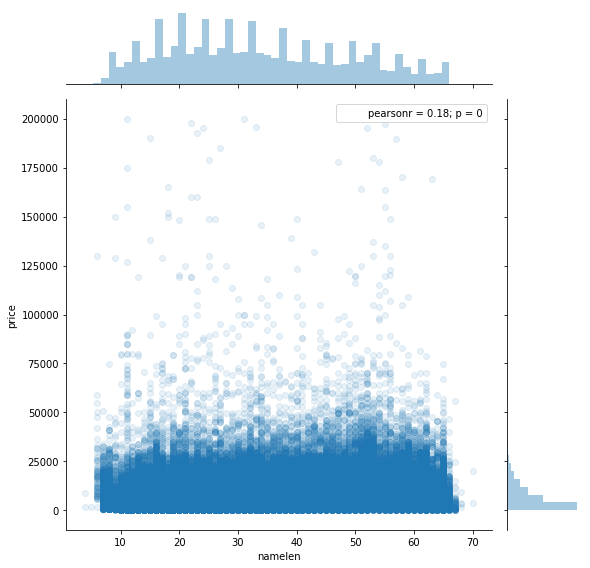

In [11]:
# prix related to the size of the description lenname 
ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=data_train_with_label[['namelen','price']], 
#                   data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    size=8)

# Decrire dans cette case  les prétraitements qu on a fait sur la data dans les pipeline et décrire de nouveau les variables si besoin 


### Characteristics of the car:
- **Make:**	Vehicle Manufacturer 
- **Model:** Vehicle Model
- **Trim:**	Vehicle Trim Level
- **SubModel:**	Vehicle Submodel
- **Color:**	Vehicle Color
- **Transmission:**	Vehicles transmission type (Automatic, Manual)
- **WheelTypeID:**	The type id of the vehicle wheel
- **WheelType:** The vehicle wheel type description (Alloy, Covers)
- **VehOdo:**	The vehicles odometer reading
- **Nationality:**	The Manufacturer's country
- **Size:**	The size category of the vehicle (Compact, SUV, etc.)
- **TopThreeAmericanName:** Identifies if the manufacturer is one of the top three American manufacturers

### Other variables (price, auction details, ...):
- **PurchDate:** The Date the vehicle was Purchased at Auction
- **Auction:**	Auction provider at which the  vehicle was purchased
- **VehYear:**	The manufacturer's year of the vehicle
- **VehicleAge:** The Years elapsed since the manufacturer's year
- **MMR Prices:** 8 variables. 8 MMR prices (found in the Manheim inventory: https://publish.manheim.com/en/services/valuation) based on over 10 million sales transactions for the previous 13 months of the car. Examples of variables: MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice.
- **VNZIP:** Zipcode where the car was purchased
- **VNST:** State where the the car was purchased
- **VehBCost:** Acquisition cost paid for the vehicle at time of purchase
- **WarrantyCost:** Warranty price (term=36month  and millage=36K) 
- **IsOnlineSale:** Identifies if the vehicle was originally purchased online

In [98]:
data_train_with_label.columns

Index(['seller', 'offerType', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'dateCrawled',
       'lastSeen', 'price'],
      dtype='object')

In [102]:

from pandas.plotting import scatter_matrix
#scatter_matrix(data_train_with_label.get(['dateCreated', 'dateCrawled','lastSeen']), figsize=(10, 10), diagonal='kde');

# II )  Pipeline task and prediction

# Lance le notebook à partir d ici Theo 

In [12]:
# si tu veux enregistrer dans la classe vire le # du dessous  par contre si tu veux que ça marche
# aussi sur le notebook faut laisser le # 
#%%file problem.py


import os
import pandas as pd
import rampwf as rw
from sklearn.model_selection import ShuffleSplit
import numpy as np

problem_title = 'Cars price'
_target_column_names = 'price'
_ignore_column_names = ["postalCode", "offerType" ]
#_prediction_label_names = [0, 1]

Predictions = rw.prediction_types.make_regression(
    label_names=[_target_column_names])
# An object implementing the workflow
workflow = rw.workflows.FeatureExtractorRegressor()




# New Error
# To penalize more if one did not predict a 'risk zone'


score_types = [
    rw.score_types.RMSE(name='rmse'),
    #rw.score_types.Accuracy(name='acc'),
    #rw.score_types.NegativeLogLikelihood(name='nll'),
]


def get_cv(X, y):
    bins     = np.linspace(0, max(y), 3)
    y_binned = np.digitize(y, bins)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y_binned)
    #cv = ShuffleSplit(n_splits=8, test_size=0.2)
    cv = ShuffleSplit(n_splits=8, test_size=0.2, random_state=57)
    return cv.split(X, y_binned)


def _read_data(path, f_name):
    data = pd.read_csv(os.path.join(path, 'data', f_name))
    # filter outliers 
    data = data[
    (data["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (data["powerPS"].between(100, 500, inclusive=True)) &
    (data["price"].between(100, 200000, inclusive=True))
        ]
    y_array = data[_target_column_names].values
    X_df = data.drop([_target_column_names] + _ignore_column_names, axis=1)
    X_df = X_df.reset_index().drop(['index' ], axis=1)
    return clean_and_transform(X_df), y_array


def get_train_data(path='.'):
    f_name = 'train.csv'
    return _read_data(path, f_name)


def get_test_data(path='.'):
    f_name = 'test.csv'
    return _read_data(path, f_name)

def clean_and_transform(X):
    data = X.copy()
    
    # Replace the NaN-Values
    data['namelen'] = [min(70, len(n)) for n in data['name']]
    

    data['vehicleType'].fillna(value='blank', inplace=True)
    data['gearbox'].fillna(value='blank', inplace=True)
    data['model'].fillna(value='blank', inplace=True)
    data['fuelType'].fillna(value='blank', inplace=True)
    data['notRepairedDamage'].fillna(value='blank', inplace=True)

    for col in data[:-3]:
        if data[col].dtype == "object":
            data[col] = data[col].astype('category')

    # Assign codes to categorical attributes instead of strings        
    cat_columns = data.select_dtypes(['category']).columns

    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.drop(['name' ], axis=1)
    
    

    return data

def drop_column(X, columns_to_drop=["dateCrawled", "abtest", "dateCreated", "lastSeen"]):
    data = X.copy()
    data = data.drop(columns_to_drop, axis=1)
    return data



    for col in data[:-3]:
        if data[col].dtype == "object":
            data[col] = data[col].astype('category')

    # Assign codes to categorical attributes instead of strings        
    cat_columns = data.select_dtypes(['category']).columns

    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.drop(['name' ], axis=1)
    
    

    return data

def drop_column(X, columns_to_drop=["dateCrawled", "abtest", "dateCreated", "lastSeen"]):
    data = X.copy()
    data = data.drop(columns_to_drop, axis=1)
    return data



In [13]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import FeatureUnion
from sklearn.tree import DecisionTreeRegressor
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

import numpy as np


In [14]:
train_X, train_y = get_train_data()
test_X, test_y = get_test_data()


In [15]:
# vehicleType NAn, changer les variables avec des string 
# example de comment gérer ça dans le feature extractor à cette adresse 
#https://github.com/schesho/Datacamp_lemon/blob/master/submissions/starting_kit/feature_extractor.py
# avec des fillan et des getdummie (one hot tes variables ) pour les variables qualitative ou autres
train_X.head()

,seller,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen,namelen
0,1,1,1,1995,0,200,38,150000,0,4,3,1,0,99603,77772,33
1,1,0,2,2005,2,163,192,150000,6,4,20,1,1,106008,78966,62
2,1,0,2,2006,2,109,8,80000,11,4,25,1,2,17392,71278,48
3,1,0,8,2009,0,239,167,125000,10,2,1,1,3,2059,15853,53
4,1,1,4,2009,2,160,28,100000,11,4,1,1,4,591,76814,59


## Data Exploration 
So now with the clean data let's make some data exploration 


### Feature extractor

We've used the same feature extractor for all of our models. We fill the Na values of MMR with their median, and we transform categorical variables to dummy ones using OneHotEncoder method

In [16]:
#%%file submissions/starting_kit/feature_exctractor.py
# pour écrire par dessus 

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


def add_missing_dummy_columns(d, columns):
    missing_cols = set(columns) - set(d.columns)
    for c in missing_cols:
        d[c] = 0


def fix_columns(d, columns):
    add_missing_dummy_columns(d, columns)

    # make sure we have all the columns we need
    assert (set(columns) - set(d.columns) == set())

    d = d[columns]
    return d


class FeatureExtractor():
    def __init__(self):
        pass
    
    #def __init__(self,attribute_names):
       # self.attribute_names = attribute_names
        
                
        
    def fit(self, X_df, y=None):
        global column_dummies
        if y is not None:
            column_dummies = pd.concat(
            [X_df.get(['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']),
             pd.get_dummies(X_df.seller, prefix = 'Size', drop_first=True),
             #pd.get_dummies(X_df.offerType, prefix='Auction', drop_first=True),
             pd.get_dummies(X_df.vehicleType, prefix='Color', drop_first=True),
             pd.get_dummies(X_df.fuelType, prefix='Transmission', drop_first=True),
             pd.get_dummies(X_df.brand, prefix='Nationality', drop_first=True),
             pd.get_dummies(X_df.notRepairedDamage, prefix='notRepairedDamage', drop_first=True),
             
             ],
            axis=1).columns
        return self
        return self
    
    
    def transform(self, X_df):
        #print(column_dummies)
        X_df_new = pd.concat(
            [X_df.get(['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']),
             pd.get_dummies(X_df.seller, prefix = 'seller', drop_first=True),
             #pd.get_dummies(X_df.offerType, prefix='Auction', drop_first=True),
             pd.get_dummies(X_df.vehicleType, prefix='vehicleType', drop_first=True),
             pd.get_dummies(X_df.fuelType, prefix='fuelType', drop_first=True),
             pd.get_dummies(X_df.brand, prefix='brand', drop_first=True),
             pd.get_dummies(X_df.notRepairedDamage, prefix='notRepairedDamage', drop_first=True),
             
             ],
            axis=1)
        #X_df_new = X_df_new.fillna(-1)
        
        X_df_new = fix_columns(X_df_new, column_dummies)
        
        scaler = StandardScaler()

        #X_df_new[['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']] = scaler.fit_transform(X_df_new [['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']])
        
        X_df_new= X_df_new.as_matrix()
        return X_df_new

# tester la base 

In [17]:
fe = FeatureExtractor()
fe.fit(train_X, train_y)
X = fe.transform(train_X)
X.shape

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(123390, 63)

## Regressor 

In [18]:
#%%file submissions/starting_kit/regressor.py
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = DecisionTreeRegressor(random_state=42)
        #self.reg = LinearRegression()

    def fit(self, X, y):
        self.reg.fit(X, y)


    def predict(self, X):
        return self.reg.predict(X)[:, np.newaxis] 

## Test pipeline 

In [19]:
# 4900 normalement quand bien traité

from sklearn.pipeline import make_pipeline
model = make_pipeline(FeatureExtractor(), Regressor())
model.fit(train_X, train_y)
y_pred_train = model.predict(train_X)
print("train rmse ",np.sqrt(mean_squared_error(train_y, y_pred_train)))
y_pred_test = model.predict(test_X)
print("test rmse ", np.sqrt(mean_squared_error(test_y, y_pred_test)))

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


train rmse  839.3907217581634
test rmse  5382.091481673454


D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [16]:
# 6333 linear regression,  4900 decision tree regressor 
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
# Offline i used CV=10

scores = cross_val_score(model, train_X, train_y,
                         scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)



D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Programmes\Anaconda2\lib\site-packages\ipyk

Scores: [5349.43346843 5516.15063124 5389.57918484 5469.60820689]
Mean: 5431.192872852036
Standard deviation: 65.40232763519587


D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [20]:
!ramp_test_submission --submission starting_kit

Testing Cars price
Reading train and test files from ./data ...
Reading cv ...
Training .\submissions\starting_kit ...
CV fold 0


d:\programmes\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int8, int16, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\programmes\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
.\submissions\starting_kit\feature_extractor.py:70: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_df_new= X_df_new.as_matrix()
d:\programmes\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int8, int16, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\programmes\anaconda2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16, int64 were all converted to float64